
# About Delhivery : 

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


# Business Problem Statement  :


- The company wants to understand and process the data coming out of data engineering pipelines:

>• Clean, sanitize and manipulate data to get useful features out of raw fields

>• Make sense out of the raw data and help the data science team to build forecasting models on it.


### Column Profiling:

- data :  tells whether the data is testing or training data


- trip_creation_time : Timestamp of trip creation
- route_schedule_uuid : Unique Id for a particular route schedule
- route_type : Transportation type 
    - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles (carts)
    
- trip_uuid : Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center : Source ID of trip origin
- source_name : Source Name of trip origin
- destination_cente : Destination ID
- destination_name : Destination Name
- od_start_time : Trip start time
- od_end_time : Trip end time
- start_scan_to_end_scan : Time taken to deliver from source to destination
- is_cutoff : Unknown field
- cutoff_factor : Unknown field
- cutoff_timestamp : Unknown field
- actual_distance_to_destination : Distance in Kms between source and destination warehouse
- actual_time : Actual time taken to complete the delivery (Cumulative)
- osrm_time : An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance : An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor : Unknown field
- segment_actual_time : This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time : This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance : This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor : Unknown field





- #### In-depth analysis and feature engineering to be done : 
    
    > - time taken between od_start_time and od_end_time 
    
    > - hypothesis testing/ Visual analysis : population mean of start_scan_to_end_scan & time taken between od_start_time and od_end_time
    > - hypothesis testing/ visual analysis :
            - actual_time aggregated value and OSRM time aggregated value 
            
    > - hypothesis testing/ visual analysis :
            - actual_time aggregated value and segment actual time 
            
    > - hypothesis testing/ visual analysis : 
            - osrm distance aggregated value and segment osrm distance 
            
    > - hypothesis testing/ visual analysis :
            - osrm time aggregated value and segment osrm time aggregated value
            
            
    > - outliers in the numerical variables 
    
    > - outliers using the IQR method.
    
    > - one-hot encoding of categorical variables (like route_type)
    
    > - Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("delhivery_data.txt")

In [4]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Understanding shape and structure of data : 

In [5]:
df.shape

(144867, 24)

In [6]:
# 144,867 total Records 
# 24 columns 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
# features : source_name and destination_name having few missing values

## Changing data type for data and time related features : 


In [10]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

## Extracting Trip Creation Informations from Trip Creation time : 

In [11]:
df["trip_creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: trip_creation_time, dtype: int64

In [12]:
df["trip_creation_time"].dt.year.value_counts()

2018    144867
Name: trip_creation_time, dtype: int64

In [13]:
# delivery trip data is given from Septemebr and October 2018.

In [14]:
df["trip_creation_day"] = (df["trip_creation_time"].dt.day_name())
df["trip_creation_month"] = (df["trip_creation_time"].dt.month_name())
df["trip_creation_year"] = (df["trip_creation_time"].dt.year)

<AxesSubplot:>

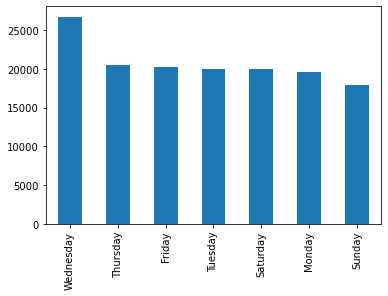

In [15]:
df["trip_creation_day"].value_counts().plot(kind = "bar")

In [16]:
# wednesday seems to have relatively higher records of data compare to other days . 
df["trip_creation_day"].value_counts(normalize=True)*100

Wednesday    18.452788
Thursday     14.137795
Friday       13.972816
Tuesday      13.778845
Saturday     13.761588
Monday       13.560714
Sunday       12.335453
Name: trip_creation_day, dtype: float64

# Understanding the structure : 

In [17]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
trip_creation_da

### we have `14817 different trips happended between source to destinations.` 
### total ` 1504 delivery routes` we have.

#### 1508 unique source centers 
#### 1481 unique destination centres 


## There are two different kind of routes are there : 

In [18]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [19]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100

Carting    60.120132
FTL        39.879868
Name: route_type, dtype: float64

In [20]:
routeType_plot= (df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100)
routeType_plot

Carting    60.120132
FTL        39.879868
Name: route_type, dtype: float64

<AxesSubplot:ylabel='route_type'>

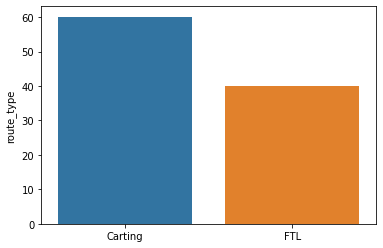

In [21]:
sns.barplot(x= routeType_plot.index,
           y = routeType_plot)

#### From `14817 total different trips` , we have 
#### 8908 `(60%)` of the trip-routes are `Carting` , which consists of small vehicles and 
#### 5909 `(40%)` of total trip-routes are `FTL` : which are Full Truck Load get to the destination sooner.  as no otther pickups  or drop offs along the way . 

# Undestanding Features and Feature Engineering  :

## Analyzing records for one particular trip id : 


In [22]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,September,2018
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,September,2018
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,September,2018
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,September,2018
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,September,2018
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Thursday,September,2018
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Thursday,September,2018
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Thursday,September,2018
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,Thursday,September,2018
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320

    from above one particular trip record , 
    trip is segmented between different drop locations .

    we can observe 
    trip is taking stops between mentioned source and destination centers(warehouses).
    od-end-tiem and od-start-time are the time when the that particular trip was ended and started .

    start-scan-to-end-scan is the time duration of trips are being scanned when start and end. 
    start-scan-to-end-scan time is given cummulative. which is not given per trip segments.


    trip cut off False ,shows the record of trip when trip changes from one warehouse to another. between source to destination. 


    Actual-time given is the time to complete the entire delivery from source to destination (given cumulatively )




    osrm -time is an open rourse routing engine time calculator which computes the shortest path between points in a given map and gives the time and osrm distance gives the shortest distance (given cumulatively )


    Actual-distnace-to-destination is the actual distance between warehouses , given cummulative during the trip . 
    every time cutoff is False , distance count starts from begining. 

    Segmment actual time,  is the actual time taken between two stops in between trips. given per each segment (taken between subset of package delivery)

    segment osrm time is the osrm segment time , taken between subset of package delivery




### Extracting Features like city - place - code -state from source and destination name columns : 

In [23]:
df["source_city"] = df["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [24]:
df["source_place"] = df["source_name"].str.split("_",n=2,expand=True)[1]
df["destination_place"] = df["destination_name"].str.split("_",n=2,expand=True)[1]



In [25]:
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )

In [26]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-


####  Time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan : 

In [27]:
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

#### Converting given time duration features into hours . 
    start_scan_to_end_scan
    actual_time
    osrm_time
    segment_actual_time
    segment_osrm_time
    

In [28]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60


In [29]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55,10.435660,0.233333,0.183333,11.9653,1.272727,0.233333,0.183333,11.9653,1.272727,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55,18.936842,0.400000,0.333333,21.7243,1.200000,0.166667,0.150000,9.7590,1.111111,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,0.666667,0.466667,32.5395,1.428571,0.266667,0.116667,10.8152,2.285714,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57,36.118028,1.033333,0.666667,45.5620,1.550000,0.350000,0.200000,13.0224,1.750000,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55,39.386040,1.133333,0.733333,54.2181,1.545455,0.100000,0.083333,3.9153,1.200000,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,45,2018-09-20 21:57:20,45.258278,1.566667,1.000000,67.9280,1.566667,0.200000,0.200000,8.1858,1.000000,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,7.116667,True,54,2018-09-20 21:31:18,54.092531,2.000000,1.266667,85.6829,1.578947,0.433333,0.350000,17.3725,1.238095,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bi

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144574 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144606 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

In [31]:
df.isna().sum()

data                                     0
trip_creation_time                       0
route_schedule_uuid                      0
route_type                               0
trip_uuid                                0
source_center                            0
source_name                            293
destination_center                       0
destination_name                       261
od_start_time                            0
od_end_time                              0
start_scan_to_end_scan                   0
is_cutoff                                0
cutoff_factor                            0
cutoff_timestamp                         0
actual_distance_to_destination           0
actual_time                              0
osrm_time                                0
osrm_distance                            0
factor                                   0
segment_actual_time                      0
segment_osrm_time                        0
segment_osrm_distance                    0
segment_fac

In [32]:
df.shape

(144867, 36)

## Data cleaning : 

In [33]:
df["source_state"] = df["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })

In [34]:
df["destination_state"] = df["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [35]:
df["destination_city"].replace({
    "del":"Delhi"
},inplace=True)
df["source_city"].replace({
    "del":"Delhi"
},inplace=True)

In [36]:
df["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)


In [37]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

In [38]:
df["source_city_state"].nunique()

1249

In [39]:
df["destination_city_state"].nunique()

1242

In [40]:
df["source_state"].nunique()

33

In [41]:
df["destination_state"].nunique()

32

from source : https://worldpopulationreview.com/countries/cities/india


India has 48 cities with more than a million people, 405 cities with between 100,000 and 1 million people, and 2500 cities with between 10,000 and 100,000 people. The largest city in India is Mumbai, with a population of people.

In [42]:
## Delhivery delivered in approdimately 1250 cities and almost all the states all over in india. 

In [43]:
data = df.copy()

In [44]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'source_place', 'destination_place', 'source_pincode',
       'destination_pincode', 'time_taken_btwn_odstart_and_od_end',
       'source_city_state', 'destination_city_state'],
      dtype='object')

In [45]:
# data[["source_city","source_state","destination_city","destination_state","source_city_state","destination_city_state"]].fillna()

In [46]:
# above data we impute after aggregating as per tripIDs. 

In [47]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'source_place', 'destination_place', 'source_pincode',
       'destination_pincode', 'time_taken_btwn_odstart_and_od_end',
       'source_city_state', 'destination_city_state'],
      dtype='object')

In [48]:
data.drop(['source_center',"source_name","destination_center","destination_name","cutoff_timestamp"],axis = 1,inplace=True)

In [49]:
data.drop(["od_end_time","od_start_time"],axis = 1 , inplace=True)

In [50]:
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,9,10.435660,0.233333,0.183333,11.9653,1.272727,0.233333,0.183333,11.9653,1.272727,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,18,18.936842,0.400000,0.333333,21.7243,1.200000,0.166667,0.150000,9.7590,1.111111,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,27,27.637279,0.666667,0.466667,32.5395,1.428571,0.266667,0.116667,10.8152,2.285714,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,36,36.118028,1.033333,0.666667,45.5620,1.550000,0.350000,0.200000,13.0224,1.750000,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,False,39,39.386040,1.133333,0.733333,54.2181,1.545455,0.100000,0.083333,3.9153,1.200000,Thursday,September,2018,Anand,Gujarat,Khambhat,Gujarat,VUNagar,MotvdDPP,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,45,45.258278,1.566667,1.000000,67.9280,1.566667,0.200000,0.200000,8.1858,1.000000,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,54,54.092531,2.000000,1.266667,85.6829,1.578947,0.433333,0.350000,17.3725,1.238095,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,63,66.163591,2.333333,1.466667,97.0933,1.590909,0.333333,0.566667,20.7053,0.588235,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,7.116667,True,72,73.680667,2.633333,1.633333,111.2709,1.612245,0.283333,0.450000,18.8885,0.629630,Thursday,September,2018,Sonipat,Haryana,Gurgaon,Haryana,Kundli,Bilaspur,131028,000000,7.128106,Sonipat Haryana,Gurgaon Haryana


# Aggregating Data : 

In [51]:
actual_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()
segment_osrm_time = data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_actual_time = data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
osrm_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
time_taken_btwn_odstart_and_od_end = data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()

time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 

osrm_distance = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()
actual_distance_to_destination = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()
segment_osrm_distance = data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()


****

# Hypothesis Tests for time durations and distance related features : 


****

## Analysing TimeTaken Between OdStart and OdEnd time & StartScanToEndScan : 

> #### H0: Mean of time taken betweenn trip end ans start time = Mean of start and end scan time
> #### Ha: Mean of time taken betweenn trip end ans start time != Mean of start and end scan time


<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

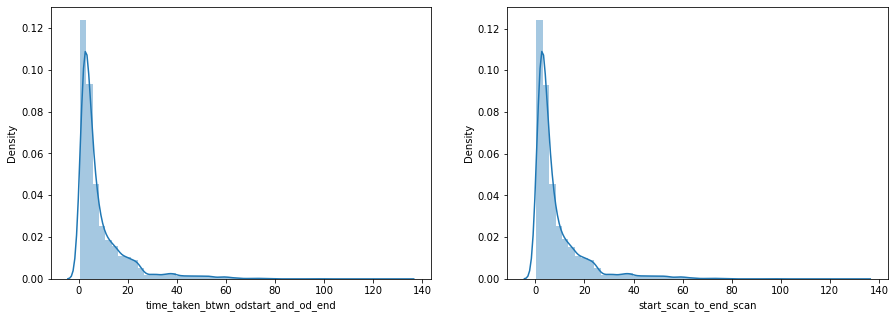

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

In [53]:
# KS-test : checking the distributions how closly equal thy are : 

In [54]:
stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"],start_scan_to_end_scan["start_scan_to_end_scan"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.004184382803536474, pvalue=0.9994337058695081)

In [55]:
for i in range(5):
    print(stats.ttest_ind((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000))))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.9716508785225971, pvalue=0.33126344290575926)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.5567970071788092, pvalue=0.5776869027555587)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.9443024700723182, pvalue=0.34505313959905415)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.1332016137806006, pvalue=0.8940384030818919)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.0779783124344828, pvalue=0.28108678529475184)


> #### from Kolmogorov–Smirnov test , p-value is 0.9943 , from which we can conclude  tht both the distributions

> #### (time_taken_btwn_odstart_and_od_end and start_scan_to_end_scan) are closly similar.


> ####  from 2 sample t-test ,we can also conclude that Average time_taken_btwn_odstart_and_od_end for population is also equal to Average start_scan_to_end_scan for population.

In [56]:
# also checking mean and standard deviation for timetaken and scan times : 

In [57]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean(),time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].std()

(8.861857235305067, 10.981665759990623)

In [58]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804325, 10.97628639143973)

In [59]:
# variance and means both are closly similar for scan time and trip start and end time taken 


## Analysing Actual Time taken to complete the delivery  &  start-scan-end-scan

> #### H0: Mean of start and end scan time <=  Mean of Actual time taken to complete delivery 
> #### Ha: Mean of start and end scan time  > Mean of Actual time taken to complete delivery


<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

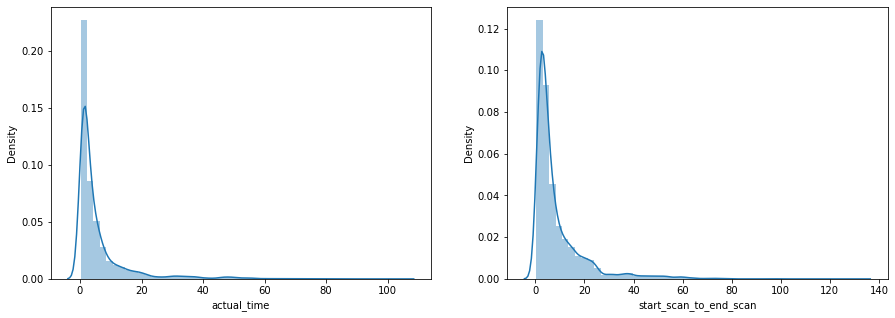

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

In [61]:
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.27387460349598436, pvalue=0.0)

In [62]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less"))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-11.63433183388071, pvalue=2.9583265159466375e-31)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-10.646343810381081, pvalue=1.553084944843656e-26)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-10.156542708781046, pvalue=2.422564888869492e-24)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-10.114166980280935, pvalue=3.7103301862926956e-24)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-11.503124522312334, pvalue=1.3201426804392581e-30)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-11.480381777463917, pvalue=1.7080817943699753e-30)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-11.828941944307852, pvalue=3.124724654614158e-32)


> #### from KS test for actual-time and start_scan_to_end_scan distributions are not same.

> #### from ttest of population average actual_time is less than population average start_scan_to_end_scan.

In [63]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435117, 9.35554782297388)

In [64]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804325, 10.97628639143973)

## Analysing Actual Time & TimeTaken between start and end trip time. 

> #### H0: Mean of Actual time taken to complete delivery =  Mean of time taken betweenn trip end ans start time
> #### Ha: Mean of Actual time taken to complete delivery  !=  Mean of time taken betweenn trip end ans start time

In [65]:
stats.ks_2samp(actual_time["actual_time"],time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.2765067152594992, pvalue=0.0)

In [66]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000))
                ,(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-6.339363378930524, pvalue=2.844207890862028e-10)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-5.287428254125523, pvalue=1.3760850460629462e-07)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-5.426527295043085, pvalue=6.444232760235031e-08)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-7.008804877370162, pvalue=3.274269234731331e-12)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-7.274518124194945, pvalue=4.969630991558775e-13)


> #### from above kstest of distribution and two sample ttest , 
> #### we can conclude that population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

## Analysing  Actual Time   taken to complete delivery from source to destination hub    &   OSRM measured time : 

> #### H0: Mean of OSRM time  >=  Mean of Actual time taken to complete delivery
> #### Ha: Mean of OSRM time  <  Mean of Actual time taken to complete delivery 

<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

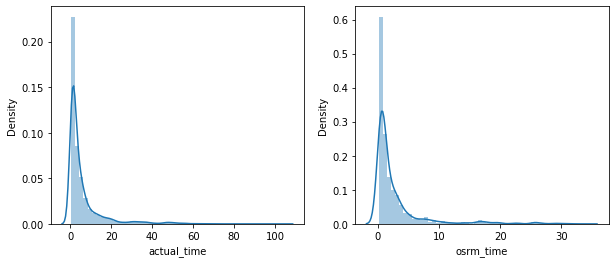

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

In [68]:
stats.ks_2samp(actual_time["actual_time"],
               osrm_time["osrm_time"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.2945265573327934, pvalue=0.0)

In [69]:
for i in range(5):
    print(stats.ttest_ind(actual_time["actual_time"].sample(5000),
               osrm_time["osrm_time"].sample(5000),alternative='greater'))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=22.275852062067113, pvalue=1.2586832394425356e-107)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=22.840308069504303, pvalue=6.723368237976783e-113)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=21.655547845863687, pvalue=5.708722419472675e-102)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=22.748352118857557, pvalue=4.94980866328736e-112)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=22.70043491079571, pvalue=1.3967821910213581e-111)


> #### from two sample ttest can conclude , that population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same. 
> #### actual time is higher than the osrm estimated time for delivery.

In [70]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435117, 9.35554782297388)

In [71]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(2.697313896200314, 4.537654251845703)

## Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :  

> #### H0: Actual time = segment actual time
> #### Ha: Actual time != segment actual time

<AxesSubplot:xlabel='segment_actual_time', ylabel='Density'>

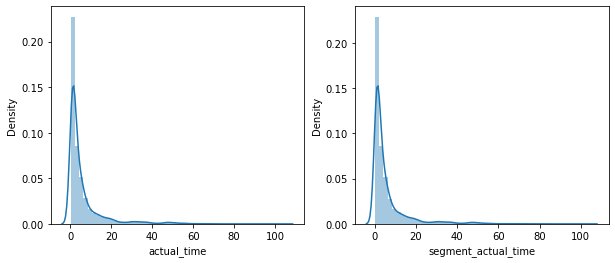

In [72]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

In [73]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000)),
                (segment_actual_time["segment_actual_time"].sample(3000))))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.668982430355294, pvalue=0.5035324325305446)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.0928793187629657, pvalue=0.27449068140309024)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.18976302834376332, pvalue=0.8495012497910923)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.8787326099267305, pvalue=0.06032947096429208)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.261938449594607, pvalue=0.7933778903832364)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.8172223579091173, pvalue=0.06923295050680427)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.17973873333446588, pvalue=0.8573637553487372)


> #### from two sample ttest , we can conclude that
> #### Population average for
> #### Actual Time taken to complete delivery trip and segment actual time are same. 


In [74]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435117, 9.35554782297388)

In [75]:
segment_actual_time["segment_actual_time"].mean(),segment_actual_time["segment_actual_time"].std()

(5.898204764797215, 9.270799413152762)

## Analysing osrm Time  & segment-osrm-time :  

> #### H0: segment actual time <= OSRM time
> #### Ha: segment actual time > OSRM time

<AxesSubplot:xlabel='segment_osrm_time', ylabel='Density'>

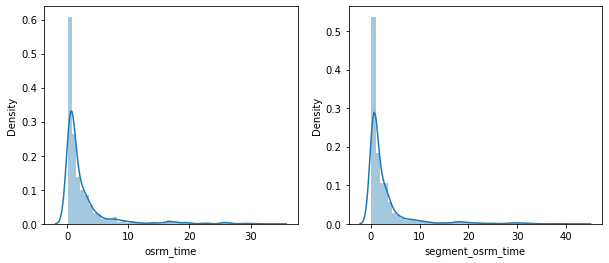

In [76]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_time["osrm_time"])))
plt.subplot(122)
sns.distplot(((segment_osrm_time["segment_osrm_time"])))

In [77]:
for i in range(7):
    print(stats.ttest_ind((osrm_time["osrm_time"].sample(3000)),
                (segment_osrm_time["segment_osrm_time"].sample(3000)),alternative ="less"))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-3.9043900186502776, pvalue=4.774987601124152e-05)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.3492890821791597, pvalue=0.009420778139131399)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-3.8650902297510834, pvalue=5.611034049972779e-05)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.9894378987333314, pvalue=0.0014031259058058675)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.3435499156387603, pvalue=0.08957240009955342)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.197740666984369, pvalue=0.014002838853677181)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.7891500916110057, pvalue=0.0026506620667620814)


> #### from ttest , we can conclude that 
> #### average of osrm Time & segment-osrm-time for population is not same. 
> #### Population Mean osrm time  is less than Population Mean segment osrm time.


In [78]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(2.697313896200314, 4.537654251845703)

In [79]:
segment_osrm_time["segment_osrm_time"].mean(),segment_osrm_time["segment_osrm_time"].std()


(3.0158297901059705, 5.242367441693007)

# Analysing Distances measures : 

## Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance  :

> #### H0 : Segment OSRM distnace <= OSRM distnace
> #### Ha : Segment OSRM distnace > OSRM distnace

<AxesSubplot:xlabel='segment_osrm_distance', ylabel='Density'>

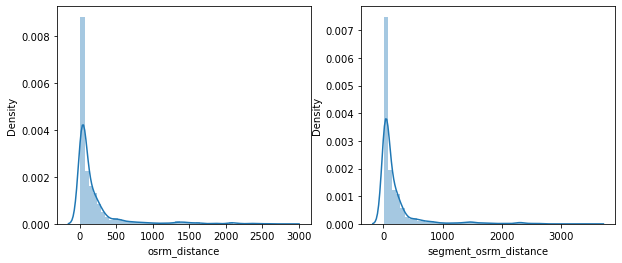

In [80]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

In [81]:
stats.ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10)

In [82]:
for i in range(7):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               segment_osrm_distance["segment_osrm_distance"].sample(5000),alternative="less"))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.491000734355803, pvalue=0.006377239874874842)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.102001693118751, pvalue=0.017789038400820426)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-3.3966080254519477, pvalue=0.00034246196944600184)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.5542752505894315, pvalue=0.005327801097742841)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.0712919316998133, pvalue=0.14203202292688147)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.6319798477969442, pvalue=0.26370724791908506)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.8196040126585413, pvalue=0.002408876652137734)


In [83]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551625, 370.74927471335496)

In [84]:
segment_osrm_distance["segment_osrm_distance"].mean(),segment_osrm_distance["segment_osrm_distance"].std()

(223.20116128771042, 416.6283742907418)

>    #### from KS test , we can conclude the distributions of segment osrm distance and osrm distnace are not same! 
>    #### from two sample one sided ttest, we can conclude: Average of osrm distance for population is less than  average of segment osrm distnace 

## Analysing and Visulizing OSRM Estimated distance and Actual Distance between source and destination warehouse :

> #### H0 : Mean OSRM distance <= Mean Actual distnace 
> #### Ha : Mean OSRM distance > Mean Actual distnace 

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='Density'>

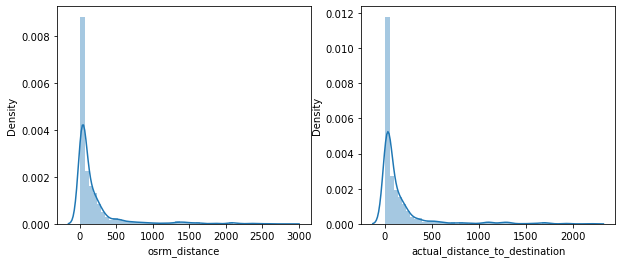

In [85]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((actual_distance_to_destination["actual_distance_to_destination"])))

In [86]:
stats.ks_2samp(osrm_distance["osrm_distance"],actual_distance_to_destination["actual_distance_to_destination"])

<IPython.core.display.Javascript object>

KstestResult(statistic=0.11837753931295136, pvalue=6.578385372142345e-91)

In [87]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               actual_distance_to_destination["actual_distance_to_destination"].sample(5000),alternative="greater"))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=5.986800487278355, pvalue=1.1068469174541993e-09)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=6.733721409029123, pvalue=8.723285355072898e-12)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=7.414041580271733, pvalue=6.622254242522077e-14)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=5.3925866490117045, pvalue=3.5516787577043784e-08)


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=5.791549079071094, pvalue=3.5922124805689545e-09)


> #### From left sided ttest , we can conclude 
> #### for population osrm estimated distance is higher than the actual distacne from source to destination warehouse. 

In [88]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551625, 370.74927471335496)

In [89]:
actual_distance_to_destination["actual_distance_to_destination"].mean(),actual_distance_to_destination["actual_distance_to_destination"].std()

(164.4733217454422, 305.5408288910492)

****

****
****

****

# Merging All the numerical Fields as per TripID: 

In [90]:
distances = segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,
                                                                             on="trip_uuid"),
                                                                            on="trip_uuid")

In [91]:
time = segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(time_taken_btwn_odstart_and_od_end.merge(start_scan_to_end_scan,
                                         on="trip_uuid",
                                         ),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

In [92]:
Merge1 = time.merge(distances,on="trip_uuid",
                                        )

In [93]:
Merge1

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635


#  Merging Location details and route_type and Numerical data on TripID : 

In [94]:
city = data.groupby("trip_uuid")[["source_city",
                                  "destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

state = data.groupby("trip_uuid")[["source_state",
                                   "destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

city_state = data.groupby("trip_uuid")[["source_city_state",
                                        "destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

In [95]:
route_type = data.groupby("trip_uuid")["route_type"].unique().reset_index()

In [96]:
Merged = route_type.merge(locations.merge(Merge1,on="trip_uuid",
           how="outer"),
                 on="trip_uuid",
           how="outer"
                )

In [97]:
trip_records = Merged.copy()

In [98]:
trip_records["route_type"] = trip_records["route_type"].apply(lambda x:x[0])

In [99]:
route_to_merge = data.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()

In [100]:
trip_records = trip_records.merge(route_to_merge,on="trip_uuid",how="outer")

In [101]:
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])

In [102]:
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,"[Zirakpur, Chandigarh]","[Chandigarh Punjab, Chandigarh Chandigarh]","[Zirakpur Punjab, Chandigarh Punjab]","[Punjab, Chandigarh]",Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,"[Tirunelveli, Eral, Tirchchndr, Thisayanvilai,...","[Eral, Tirchchndr, Thisayanvilai, Peikulam, Ti...","[Tirunelveli Tamil Nadu, Eral Tamil Nadu, Tirc...","[Eral Tamil Nadu, Tirchchndr Tamil Nadu, Thisa...",Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [103]:
# route_df['source'] = route_df['source'].str.strip("{''}")

In [104]:
trip_records.isna().sum()

trip_uuid                              0
route_type                             0
source_city                           10
destination_city                       8
source_city_state                     10
destination_city_state                 8
source_state                          10
destination_state                      8
segment_osrm_time                      0
osrm_time                              0
segment_actual_time                    0
actual_time                            0
time_taken_btwn_odstart_and_od_end     0
start_scan_to_end_scan                 0
segment_osrm_distance                  0
actual_distance_to_destination         0
osrm_distance                          0
route_schedule_uuid                    0
dtype: int64

In [105]:
trip_records.loc[trip_records.isnull().any(axis=1)]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
5289,trip-153733592611290696,Carting,Gurgaon,NaN,Gurgaon Haryana,NaN,Haryana,NaN,0.600000,0.566667,1.200000,1.216667,3.437326,3.433333,39.4788,30.407059,35.3948,thanos::sroute:e591febd-564c-499a-ad94-6fa4b7f...
5778,trip-153739792417979729,FTL,Luxettipet,NaN,Luxettipet Telangana,NaN,Telangana,NaN,0.966667,0.966667,2.600000,2.616667,2.964513,2.950000,64.6296,51.604090,64.6296,thanos::sroute:0fe10045-cf65-4c70-8115-4e4cf80...
5961,trip-153741501937042684,Carting,Gurgaon,NaN,Gurgaon Haryana,NaN,Haryana,NaN,0.550000,0.583333,1.583333,1.600000,4.748660,4.733333,35.5767,29.227677,35.5767,thanos::sroute:e591febd-564c-499a-ad94-6fa4b7f...
8762,trip-153776806236494354,FTL,NaN,Mainpuri,NaN,Mainpuri Uttar Pradesh,NaN,Uttar Pradesh,3.950000,3.900000,4.283333,4.300000,4.352243,4.350000,315.5863,236.815038,294.2514,thanos::sroute:265efe06-3625-4fba-afee-07b5b64...
8796,trip-153777348608709328,FTL,Aligarh,NaN,Aligarh Uttar Pradesh,NaN,Uttar Pradesh,NaN,1.233333,1.233333,3.033333,3.050000,3.786026,3.783333,92.1350,76.647402,92.1309,thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...
9835,trip-153791004076950775,FTL,NaN,Chikmagalur,NaN,Chikmagalur Karnataka,NaN,Karnataka,0.883333,0.766667,0.683333,0.700000,0.743173,0.733333,52.0094,35.760236,49.5545,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...
10562,trip-153800051661903546,FTL,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,0.816667,2.116667,2.133333,2.146146,2.133333,60.9205,50.844665,60.9205,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...
11468,trip-153811367563100850,FTL,NaN,Mainpuri,NaN,Mainpuri Uttar Pradesh,NaN,Uttar Pradesh,1.650000,1.466667,3.500000,3.516667,4.195233,4.183333,126.3234,99.115749,110.1333,thanos::sroute:3c657b6b-38e9-437f-a02f-1cd0a27...
12097,trip-153820032399976293,FTL,NaN,Mainpuri,NaN,Mainpuri Uttar Pradesh,NaN,Uttar Pradesh,1.683333,1.466667,3.016667,3.033333,4.312456,4.300000,126.5971,99.026861,110.1448,thanos::sroute:3c657b6b-38e9-437f-a02f-1cd0a27...
13104,trip-153835867702133730,FTL,NaN,Mathura,NaN,Mathura Uttar Pradesh,NaN,Uttar Pradesh,1.600000,1.266667,1.950000,1.950000,3.104244,3.100000,95.9942,44.104960,81.9201,thanos::sroute:ae08e84c-e6e4-411a-8c2f-27af4cf...


In [106]:
trip_records[trip_records["trip_uuid"]=="trip-153852612674280168"]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
14199,trip-153852612674280168,FTL,NaN,Mathura,NaN,Mathura Uttar Pradesh,NaN,Uttar Pradesh,1.533333,1.266667,1.433333,1.433333,2.792559,2.783333,90.9055,44.089609,80.8431,thanos::sroute:ae08e84c-e6e4-411a-8c2f-27af4cf...


In [107]:
trip_records.dropna(axis= 0,how = 'any',inplace = True)

In [108]:
trip_records["source_city"] = trip_records["source_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

### Checking if any null values left in Trip Records Data : 

In [109]:
trip_records.isna().sum()

trip_uuid                             0
route_type                            0
source_city                           0
destination_city                      0
source_city_state                     0
destination_city_state                0
source_state                          0
destination_state                     0
segment_osrm_time                     0
osrm_time                             0
segment_actual_time                   0
actual_time                           0
time_taken_btwn_odstart_and_od_end    0
start_scan_to_end_scan                0
segment_osrm_distance                 0
actual_distance_to_destination        0
osrm_distance                         0
route_schedule_uuid                   0
dtype: int64

In [110]:
trip_records.loc[trip_records.isnull().any(axis=1)]

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid


In [111]:
trip_records.to_csv("trip_records.csv")

## Treating Outliers : 

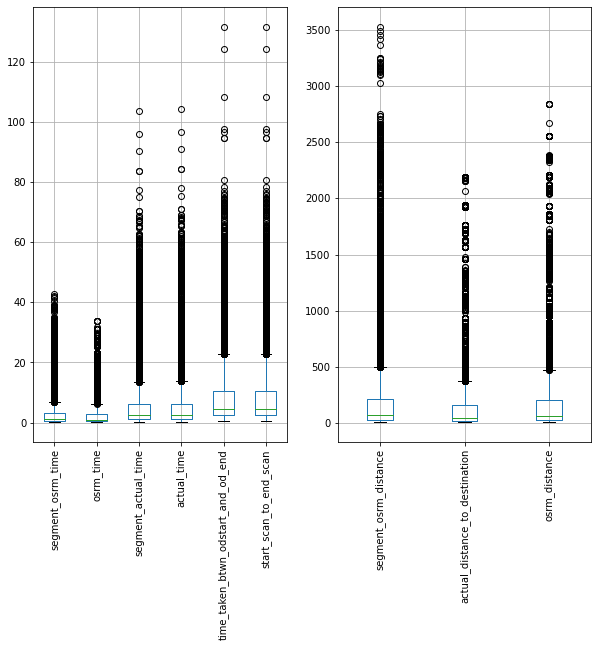

In [112]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [113]:
outlier_treatment  = trip_records.copy()

In [114]:
outlier_treatment_num = outlier_treatment[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
        'segment_osrm_distance', 'actual_distance_to_destination',
        'osrm_distance']]

In [115]:
# outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)]

## After removing outliers from all numerical features :  

In [116]:
trip_records_without_outliers = trip_records.loc[outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)].index]
trip_records_without_outliers

<IPython.core.display.Javascript object>

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
5,trip-153671055416136166,Carting,Chennai,Chennai,Chennai Tamil Nadu,Chennai Tamil Nadu,Tamil Nadu,Tamil Nadu,0.383333,0.383333,1.000000,1.016667,3.174797,3.150000,28.0647,24.597048,28.0647,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Zirakpur Chandigarh,Chandigarh Punjab Chandigarh Chandigarh,Zirakpur Punjab Chandigarh Punjab,Punjab Chandigarh,Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tirunelveli Tamil Nadu Eral Tamil Nadu Tirchch...,Eral Tamil Nadu Tirchchndr Tamil Nadu Thisayan...,Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [117]:
trip_records_without_outliers = trip_records_without_outliers[['trip_uuid','route_type','source_city_state', 'destination_city_state','segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
       'segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']]

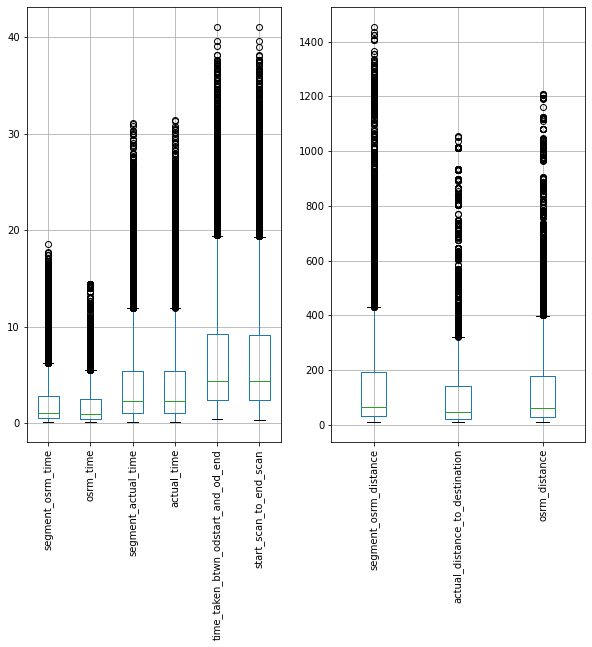

In [118]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records_without_outliers[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records_without_outliers[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

## Processing Data for One hot encoding : 

### merging locations details into one columns . and re categorise the data as per highest trips having location as top category 


In [119]:
trip_records_without_outliers["destination_source_locations"] = trip_records_without_outliers["source_city_state"]+" "+trip_records_without_outliers["destination_city_state"]
trip_records_without_outliers.drop(["source_city_state","destination_city_state"],axis = 1,inplace=True)


In [120]:
sc_dc = trip_records_without_outliers.groupby(["destination_source_locations"])["trip_uuid"].nunique().sort_values(ascending= False).reset_index()


In [121]:
# trip_records.groupby(['source_state','destination_state'])["trip_uuid"].nunique().sort_values(ascending= False).reset_index().head(30)

In [122]:
def get_cat(H):
    if 0 <= H <= 50:
        return "Category 7"
    elif 51 <= H <= 100:
        return "Category 6"
    elif 101 <= H <= 200:
        return "Category 5"
    elif 201 <= H <= 300:
        return "Category 4"
    elif 301 <= H <= 400:
        return "Category 3"
    elif 401 <= H <= 500:
        return "Category 2"
    else:
        return "Category 1"

In [123]:
sc_dc["city"]  = pd.Series(map(get_cat,sc_dc["trip_uuid"]))


In [124]:
trip_records_for_encoding = sc_dc.merge(trip_records_without_outliers,
            on="destination_source_locations")
trip_records_for_encoding.drop(["destination_source_locations","trip_uuid_x"],axis = 1,inplace=True)

In [125]:
trip_records_for_encoding.drop(["trip_uuid_y"],axis = 1,inplace=True)
# trip_records_for_encoding.sample(15)

In [126]:
encoded_data = pd.get_dummies(trip_records_for_encoding,
             columns=["route_type","city"] )

In [127]:
encoded_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
0,1.383333,0.950000,3.183333,3.233333,4.407028,4.400000,76.1272,42.240305,53.1902,1,0,1,0,0,0,0,0,0
1,1.150000,0.883333,2.666667,2.700000,4.063014,4.050000,59.1472,28.706240,43.5805,1,0,1,0,0,0,0,0,0
2,1.183333,0.966667,3.316667,3.333333,4.076829,4.066667,65.6004,42.150597,62.8568,1,0,1,0,0,0,0,0,0
3,0.700000,0.733333,1.316667,1.316667,4.915934,4.900000,41.8593,32.569779,42.0797,1,0,1,0,0,0,0,0,0
4,0.783333,0.666667,1.750000,1.766667,3.248617,3.233333,39.3452,29.584603,35.5419,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14139,1.416667,1.416667,2.250000,2.250000,16.665480,16.633333,93.8712,78.315119,93.8712,0,1,0,0,0,0,0,0,1
14140,0.916667,0.933333,3.066667,3.100000,15.495155,15.483333,72.6371,67.318676,72.6370,0,1,0,0,0,0,0,0,1
14141,0.300000,0.300000,0.583333,0.583333,1.227734,1.216667,18.3930,15.950641,18.3930,0,1,0,0,0,0,0,0,1
14142,1.050000,1.066667,3.116667,3.116667,3.779336,3.766667,74.7857,62.763000,74.7857,0,1,0,0,0,0,0,0,1


In [128]:
['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan' ,'segment_osrm_distance', 'actual_distance_to_destination','osrm_distance' ]

['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269289,-0.409762,-0.220506,-0.215127,-0.394519,-0.392295,-0.362848,-0.450953,-0.468243
1,-0.359897,-0.438982,-0.324769,-0.322057,-0.445953,-0.444716,-0.448923,-0.542310,-0.521474
2,-0.346953,-0.402458,-0.193600,-0.195078,-0.443887,-0.442220,-0.416211,-0.451559,-0.414697
3,-0.534643,-0.504727,-0.597197,-0.599406,-0.318432,-0.317408,-0.536560,-0.516231,-0.529787
4,-0.502283,-0.533947,-0.509751,-0.509184,-0.567714,-0.567031,-0.549305,-0.536381,-0.566002


In [131]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(encoded_data[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.069369,0.059302,0.098113,0.098719,0.098792,0.098811,0.046420,0.031804,0.036747
1,0.056757,0.054651,0.081402,0.081644,0.090329,0.090201,0.034665,0.018854,0.028743
2,0.058559,0.060465,0.102426,0.101921,0.090669,0.090611,0.039132,0.031718,0.044799
3,0.032432,0.044186,0.037736,0.037353,0.111311,0.111111,0.022697,0.022551,0.027493
4,0.036937,0.039535,0.051752,0.051761,0.070296,0.070111,0.020957,0.019694,0.022047


In [132]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269289,-0.409762,-0.220506,-0.215127,-0.394519,-0.392295,-0.362848,-0.450953,-0.468243
1,-0.359897,-0.438982,-0.324769,-0.322057,-0.445953,-0.444716,-0.448923,-0.542310,-0.521474
2,-0.346953,-0.402458,-0.193600,-0.195078,-0.443887,-0.442220,-0.416211,-0.451559,-0.414697
3,-0.534643,-0.504727,-0.597197,-0.599406,-0.318432,-0.317408,-0.536560,-0.516231,-0.529787
4,-0.502283,-0.533947,-0.509751,-0.509184,-0.567714,-0.567031,-0.549305,-0.536381,-0.566002
...,...,...,...,...,...,...,...,...,...
14139,-0.256345,-0.205223,-0.408852,-0.412279,1.438255,1.439939,-0.272899,-0.207442,-0.242900
14140,-0.450506,-0.417067,-0.244050,-0.241860,1.263278,1.267699,-0.380540,-0.281670,-0.360522
14141,-0.689972,-0.694657,-0.745182,-0.746434,-0.869859,-0.869075,-0.655517,-0.628413,-0.660994
14142,-0.398730,-0.358628,-0.233960,-0.238518,-0.488366,-0.487152,-0.369648,-0.312422,-0.348620


In [133]:
one_hot_encoded_data = encoded_data[["route_type_Carting","route_type_FTL","city_Category 1",
 "city_Category 2","city_Category 3","city_Category 4",
 "city_Category 5","city_Category 6","city_Category 7"]]

In [134]:
Standardized_Data = pd.concat([std_data,one_hot_encoded_data],axis = 1)

In [135]:
Min_Max_Scaled_Data = pd.concat([MinMax_data,one_hot_encoded_data],axis = 1)

In [136]:
Standardized_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
11015,0.753296,0.853998,0.529511,0.533380,0.466394,0.466408,0.516485,0.654699,0.656439,0,1,0,0,0,0,0,0,1
9030,-0.631724,-0.621607,-0.640920,-0.639504,-0.810951,-0.811662,-0.588444,-0.574397,-0.587702,1,0,0,0,0,0,0,0,1
8498,0.403805,0.539884,0.068738,0.068904,-0.083471,-0.085259,0.395370,0.447473,0.454529,0,1,0,0,0,0,0,0,1
6847,3.575113,3.250031,2.867010,2.892514,2.053283,2.059004,3.478959,3.366888,3.545416,0,1,0,0,0,0,0,0,1
11414,0.630327,0.649459,0.384889,0.386352,0.276167,0.276695,0.662494,0.735499,0.670403,0,1,0,0,0,0,0,0,1


In [137]:
Min_Max_Scaled_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
13119,0.121622,0.159302,0.210243,0.209178,0.211147,0.210742,0.115094,0.133736,0.138482,0,1,0,0,0,0,0,0,1
10922,0.115315,0.147674,0.184367,0.184098,0.169854,0.169332,0.098047,0.122013,0.119626,0,1,0,0,0,0,0,0,1
3917,0.025225,0.031395,0.022102,0.022412,0.047850,0.047970,0.021936,0.021697,0.023509,1,0,0,0,0,0,1,0,0
10485,0.423423,0.403488,0.453369,0.452508,0.384284,0.384174,0.411037,0.356966,0.396129,0,1,0,0,0,0,0,0,1
757,0.046847,0.054651,0.028571,0.029349,0.036322,0.036490,0.030641,0.029284,0.034307,1,0,1,0,0,0,0,0,0


# Route analysis : 

In [138]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]
C = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]
D = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]
F = data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]
G = trip_records.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = trip_records["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]


In [139]:
route_records = H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer")

In [140]:
# route_records.sort_values(by="Average_Actual_distance_to_destination",ascending=False)

In [141]:
route_records.isna().sum()

route_schedule_uuid                       0
Number_of_Trips                           6
Average_Actual_distance_to_destination    6
#source_states                            0
#destination_states                       0
destination_states                        0
source_states                             0
source_cities                             0
route_type                                0
destination_cities                        0
dtype: int64

In [142]:
route_records.dropna(inplace=True)

In [143]:
route_records["route_type"] = route_records["route_type"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_cities"] = route_records["source_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_cities"] = route_records["destination_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_states"] = route_records["source_states"].astype("str").str.strip("[]").str.replace("'","")
                             
route_records["destination_states"] = route_records["destination_states"].astype("str").str.strip("[]").str.replace("'","")                        

In [144]:
route_records

,route_schedule_uuid,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53.0,16.428868,1,1,Maharashtra,Maharashtra,LowerParel,Carting,Mumbai
1,thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5...,46.0,20.199445,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Bhiwandi
2,thanos::sroute:c736b86f-5c1d-4497-832c-876db4c...,43.0,29.740842,1,1,Haryana,Haryana,Gurgaon,Carting,Gurgaon
3,thanos::sroute:ca336899-47aa-4622-9885-b9fbb23...,41.0,15.348495,1,1,Rajasthan,Rajasthan,Jaipur,Carting,Ambabadi Jaipur
4,thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b60...,40.0,10.882902,1,1,Delhi,Uttar Pradesh,Noida,Carting,Del
...,...,...,...,...,...,...,...,...,...,...
1493,thanos::sroute:7707bf91-2c3d-42d2-b997-bce3efd...,1.0,9.471661,1,1,Gujarat,Gujarat,Surat,Carting,Surat
1494,thanos::sroute:6c3ea140-a3cf-4b78-8838-580c45a...,1.0,35.419531,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru
1495,thanos::sroute:22bb1825-736c-4578-964f-1f1e324...,1.0,48.713086,1,1,Haryana,Delhi,Del,Carting,Gurgaon
1496,thanos::sroute:fe6aca61-0f5c-4866-80ac-10ee8c7...,1.0,9.362187,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Mumbai


In [145]:
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]

In [146]:
route_records.drop(["route_schedule_uuid"],axis = 1,inplace=True)

In [147]:
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column) 

In [148]:
route_records

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,LowerParel -- Mumbai,53.0,16.428868,1,1,Maharashtra,Maharashtra,LowerParel,Carting,Mumbai
1,Mumbai -- Bhiwandi,46.0,20.199445,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Bhiwandi
2,Gurgaon -- Gurgaon,43.0,29.740842,1,1,Haryana,Haryana,Gurgaon,Carting,Gurgaon
3,Jaipur -- Ambabadi Jaipur,41.0,15.348495,1,1,Rajasthan,Rajasthan,Jaipur,Carting,Ambabadi Jaipur
4,Noida -- Del,40.0,10.882902,1,1,Delhi,Uttar Pradesh,Noida,Carting,Del
...,...,...,...,...,...,...,...,...,...,...
1493,Surat -- Surat,1.0,9.471661,1,1,Gujarat,Gujarat,Surat,Carting,Surat
1494,Bengaluru -- Bengaluru,1.0,35.419531,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru
1495,Del -- Gurgaon,1.0,48.713086,1,1,Haryana,Delhi,Del,Carting,Gurgaon
1496,Mumbai -- Mumbai,1.0,9.362187,1,1,Maharashtra,Maharashtra,Mumbai,Carting,Mumbai


In [149]:
route_records.to_csv("route_records.csv")

#  Exploratory Data Analysis : (getting some  insights from preprocessed data : )

## Busiest Route Analysis : 


### Number of Trips between cities , sorted highest to lowest
> #### Top 20 source and destination cities wihc have high freqency of trips in between . 

In [150]:
Number_of_trips_between_cities = data.groupby(["source_city_state","destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(20)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
8,Chennai Tamil Nadu,Chennai Tamil Nadu,205
9,MAA Tamil Nadu,Chennai Tamil Nadu,204


> ##### From above table, we can observe that Mumbai Maharashtra ,Delhi ,Gurgaon(Haryana),Bengaluru Karnataka	,Hyderabad Telangana,Chennai Tamil Nadu,Ahmedabad Gujarat,Pune Maharashtra,Chandigarh Chandigarh and Kolkata West Bengal	 are some cities have higest amount of trips happening states with in the city :	

In [151]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"] != Number_of_trips_between_cities["destination_city_state"]].head(25)

,source_city_state,destination_city_state,trip_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
9,MAA Tamil Nadu,Chennai Tamil Nadu,204
10,Chennai Tamil Nadu,MAA Tamil Nadu,141
11,Bengaluru Karnataka,HBR Karnataka,133
13,Pune Maharashtra,PNQ Maharashtra,122
16,Pune Maharashtra,Bhiwandi Maharashtra,107


> ##### If we talk about , not having equal source and destination states , source and destination cities having higest number of trips in between are : 
        delhi to gurgao
        Gurgaon,Haryana TO Bengaluru,Karnataka
        Bhiwandi/Mumbai,Maharashtra TO Pune Maharashtra
        Sonipat TO	Gurgaon,Haryana
        
      - it is also been observed that lots of deliveries are happening to airpots 
      - like : Chennai to MAA chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to	CCU West Bengal Kolkata International Airport , Bengluru to BLR-Bengaluru Internation Airport etc. 
        

In [152]:
route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_states",
               "#destination_states"]].sort_values(by="Number_of_Trips",ascending=False).head(25)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states
0,LowerParel -- Mumbai,53.0,16.428868,1,1
1,Mumbai -- Bhiwandi,46.0,20.199445,1,1
2,Gurgaon -- Gurgaon,43.0,29.740842,1,1
3,Jaipur -- Ambabadi Jaipur,41.0,15.348495,1,1
4,Noida -- Del,40.0,10.882902,1,1
5,Hyderabad -- Hyderabad,39.0,35.695641,1,1
6,Mumbai -- Mumbai,37.0,13.882863,1,1
7,Mumbai -- Mumbai,36.0,17.526251,1,1
8,Bhiwandi -- Mumbai,35.0,21.241534,1,1
9,Mumbai -- Mumbai,34.0,15.906614,1,1


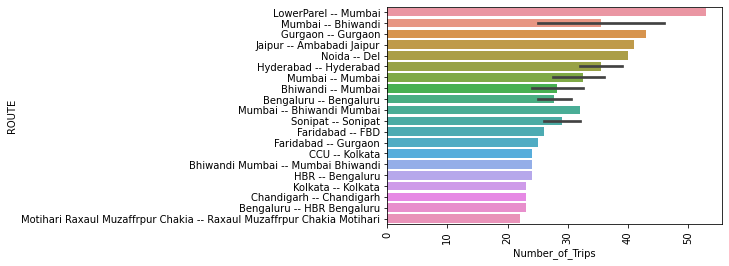

In [153]:
X = route_records[["ROUTE", "Number_of_Trips",
               ]].sort_values(by="Number_of_Trips",ascending=False).head(35)
sns.barplot(y = X["ROUTE"],
           x= X["Number_of_Trips"])
plt.xticks(rotation = 90)
plt.show()

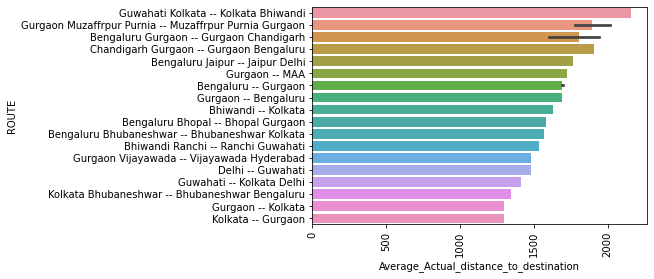

In [154]:
X = route_records[["ROUTE", "Average_Actual_distance_to_destination",
               ]].sort_values(by="Average_Actual_distance_to_destination",ascending=False).head(25)
sns.barplot(y = X["ROUTE"],
           x = X["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

> #### From above Bar chart , and table , we can observe that higest trips are happening is with in the particular cities. 
> #### in terms of average distnace between destinations , we can observe Guwahati to Mumbai , Benglore to Chandigarh ,Benglore to Delhi  , Benglore to Gurgaon are the longest routes .


## Longest Routes as per average Actual DIstance to destination :

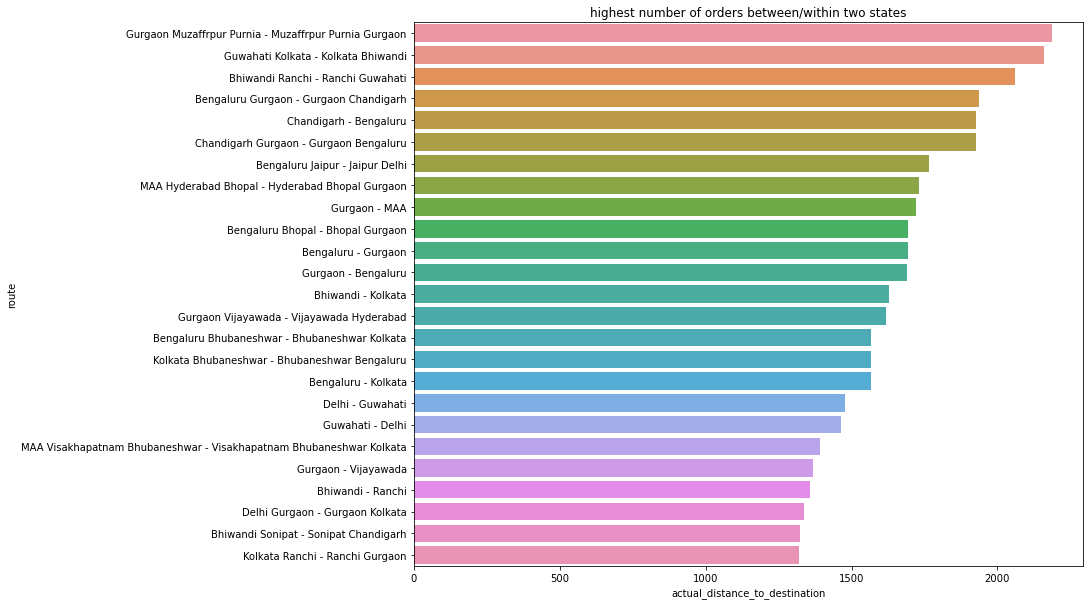

In [155]:
Longest_route_as_per_actual_distance = trip_records.groupby(["source_city",
                      "destination_city"])["actual_distance_to_destination"].mean().sort_values(ascending=False).head(25).reset_index()
Longest_route_as_per_actual_distance["route"] = Longest_route_as_per_actual_distance["source_city"] + " - " + Longest_route_as_per_actual_distance["destination_city"]
Longest_route_as_per_actual_distance.drop(["source_city","destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_distance
plt.figure(figsize=(12,10))
sns.barplot(y = Longest_route_as_per_actual_distance["route"],
           x = Longest_route_as_per_actual_distance["actual_distance_to_destination"],)
plt.title("highest number of orders between/within two states")
plt.show()

### Busiest and Longest Routes : 

In [156]:
Busiest_and_Longest_Routes  = route_records[(route_records["Average_Actual_distance_to_destination"] > route_records["Average_Actual_distance_to_destination"].quantile(0.75)) 
              & (route_records["Number_of_Trips"] > route_records["Number_of_Trips"].quantile(0.75))].sort_values(by="Average_Actual_distance_to_destination"
                                                                                                                  ,ascending=False)

In [157]:
Busiest_and_Longest_Routes[["source_cities","destination_cities","Number_of_Trips","Average_Actual_distance_to_destination"]].head(25)

,source_cities,destination_cities,Number_of_Trips,Average_Actual_distance_to_destination
62,Chandigarh Gurgaon,Gurgaon Bengaluru,22.0,1905.766051
69,Gurgaon,Bengaluru,21.0,1689.873158
84,Gurgaon,Bengaluru,21.0,1689.791894
211,Bengaluru Bhubaneshwar,Bhubaneshwar Kolkata,18.0,1567.577507
225,Guwahati,Kolkata Delhi,18.0,1411.208424
314,Kolkata Bhubaneshwar,Bhubaneshwar Bengaluru,16.0,1342.143081
331,Gurgaon,Kolkata,16.0,1300.572161
210,Delhi Gurgaon,Gurgaon Kolkata,18.0,1263.113211
299,Gurgaon,Hyderabad,16.0,1236.572072
127,Chandigarh Gurgaon,Gurgaon Bhiwandi,20.0,1170.817927


> #### Above Table shows the souce to destination city routes having largest numbers of trip happening having large distnaces :
    which are : Chandigarh TO Bengaluru
                Gurgaon TO Bengaluru
                Bengaluru TO Kolkata
                Guwahati TO Delhi
                Delhi  TO Kolkata
                Chandigarh TO Gurgaon 
                Gurgaon TO Hydrabad
                Benglore TO Ahmedabad
                Surat TO Delhi
                Gurgaon TO Ahmedabad

In [158]:
route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_states",
               "#destination_states"]].sort_values(by=["#source_states",
                                                       "Number_of_Trips"],ascending=False).head(15)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states
322,Sasaram Kanpur Kolkata Dhanbad -- Kanpur Gurga...,16.0,1028.024726,4,4
1218,Gurgaon Dholpur Jhansi Gwalior -- Dholpur Gwal...,3.0,318.038633,4,3
86,Baddi Chandigarh Kalka Nalagarh Solan Parwanoo...,21.0,138.015302,3,3
100,Sonipat Moradabad Rudrapur -- Moradabad Rudrap...,21.0,368.097596,3,3
270,Muzaffrngr Deoband Dehradun Sonipat -- Deoband...,17.0,261.648274,3,3
309,Kurnool Wanaparthy Raichur JoguGadwal nan -- R...,16.0,187.036779,3,3
334,Bengaluru Kolhapur Surat -- Kolhapur Surat Ahm...,16.0,1110.015339,3,2
392,MAA Bengaluru Pune -- Bengaluru Pune Bhiwandi,15.0,977.607461,3,2
487,Chandigarh YamunaNagar PaontSahib Ambala -- Ya...,13.0,140.854126,3,3
546,MAA Hyderabad Bhopal -- Hyderabad Bhopal Gurgaon,12.0,1048.687014,3,3


### Top 20 Longest Route as per : average actual time taken from one city to another city :

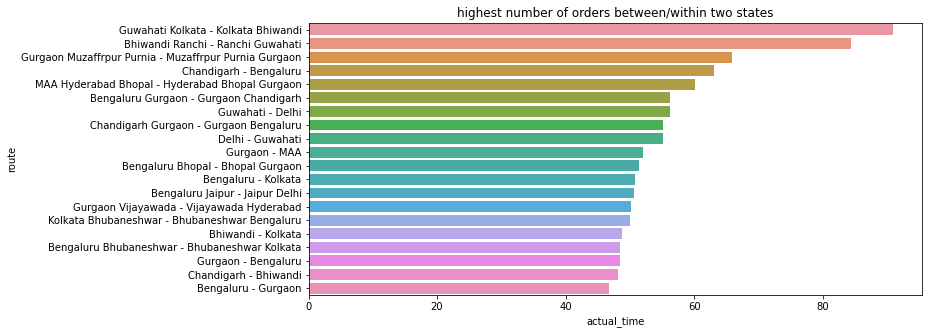

In [159]:
Longest_route_as_per_actual_trip_time = trip_records.groupby(["source_city",
                      "destination_city"])["actual_time"].mean().sort_values(ascending=False).head(20).reset_index()
Longest_route_as_per_actual_trip_time["route"] = Longest_route_as_per_actual_trip_time["source_city"] + " - " + Longest_route_as_per_actual_trip_time["destination_city"]
Longest_route_as_per_actual_trip_time.drop(["source_city",
                                            "destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_trip_time
plt.figure(figsize=(11,5))
sns.barplot(y = Longest_route_as_per_actual_trip_time["route"],
           x = Longest_route_as_per_actual_trip_time["actual_time"],)
plt.title("highest number of orders between/within two states")
plt.show()

### highest number  of orders between/within  two states : 

In [160]:
highest_order_between_states = data.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()


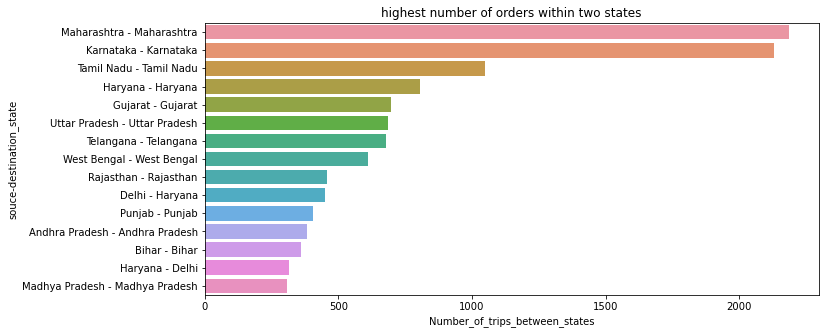

In [161]:
HOBS  = highest_order_between_states.head(15)
HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"] 

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

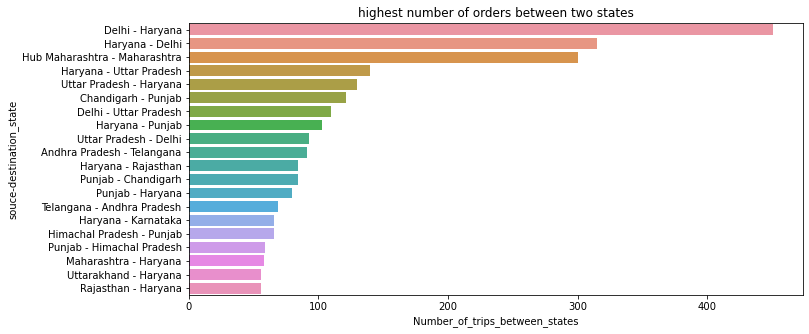

In [162]:
HOBS = data.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS = HOBS[HOBS["source_state"]!=HOBS["destination_state"]].head(20)

HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"] 

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders between two states")
plt.show()

### Top 20 warehouses with heavy traffic : 

In [163]:
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

In [164]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)


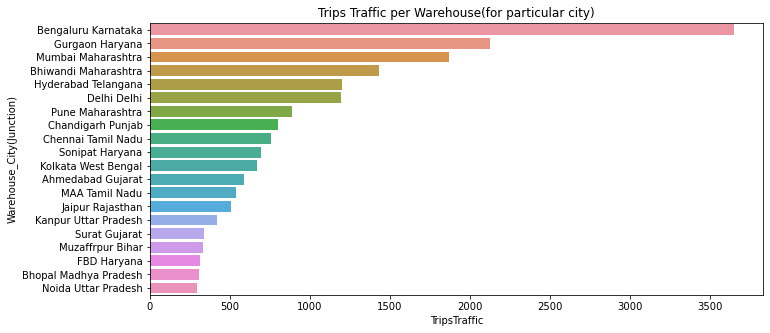

In [165]:
plt.figure(figsize=(11,5))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

> #### Top 20 Busiest Warehouse (junctions) as per trips traffic at the juction : are
 'Bengaluru Karnataka',
 'Gurgaon Haryana',
 'Mumbai Maharashtra',
 'Bhiwandi Maharashtra',
 'Hyderabad Telangana',
 'Delhi Delhi',
 'Pune Maharashtra',
 'Chandigarh Punjab',
 'Chennai Tamil Nadu',
 'Sonipat Haryana',
 'Kolkata West Bengal',
 'Ahmedabad Gujarat',
 'MAA Tamil Nadu',
 'Jaipur Rajasthan',
 'Kanpur Uttar Pradesh',
 'Surat Gujarat',
 'Muzaffrpur Bihar',
 'FBD Haryana',
 'Bhopal Madhya Pradesh',
 'Noida Uttar Pradesh'
        